In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)


c:\Users\DeLL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


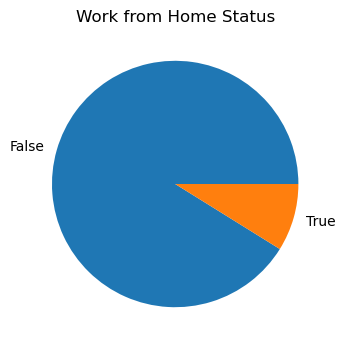

In [26]:
df['job_work_from_home'].value_counts().plot(kind='pie',figsize=(5,4))
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

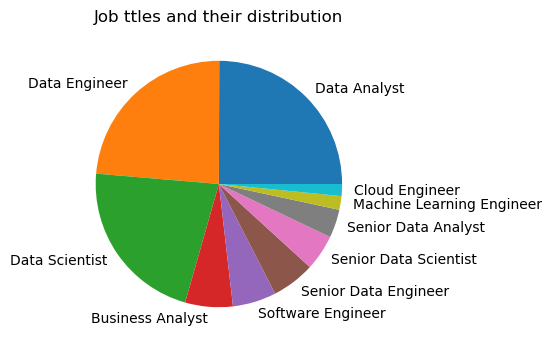

In [27]:
df['job_title_short'].value_counts().plot(kind='pie',figsize=(5,4))
plt.title('Job ttles and their distribution')
plt.ylabel('')
plt.show()

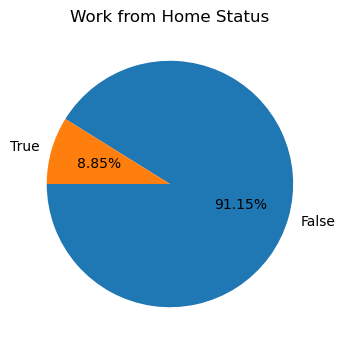

In [28]:
#Changing the start angle
df['job_work_from_home'].value_counts().plot(kind='pie',figsize=(5,4),startangle=180,autopct='%1.2f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

In [29]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]


,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


0 job_work_from_home Work from home
1 job_no_degree_mention job degree req
2 job_health_insurance Health Insurance offered


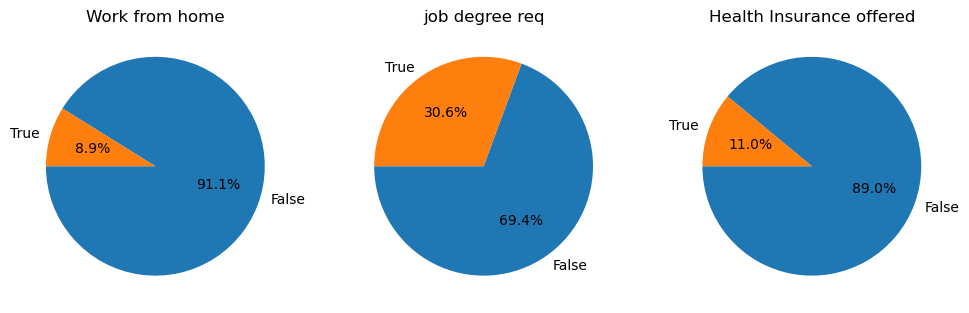

In [4]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))
dict_column = {
    'job_work_from_home':'Work from home',
    'job_no_degree_mention': 'job degree req',
    'job_health_insurance': 'Health Insurance offered'
}
for i,(column,title) in enumerate(dict_column.items()):
    print(i,column,title)
    ax[i].pie(df[column].value_counts(),startangle=180,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)

plt.show()

<Axes: xlabel='skill_count', ylabel='skill_pay'>

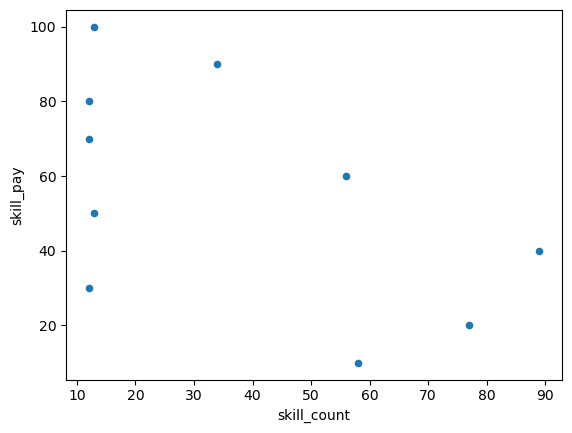

In [31]:
data = {
    'job_skills' : ['python','sql','javascript','c++','c#','java','html','css','php','ruby'],
    'skill_count' : [13,34,12,12,56,13,89,12,77,58],
    'skill_pay' : [100,90,80,70,60,50,40,30,20,10]
}


df = pd.DataFrame(data)

df.plot(kind='scatter', x='skill_count', y='skill_pay')

In [35]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)

df_DA = df[df['job_title_short']=='Data Analyst'].copy()

In [36]:
df = df[df['job_title_short'] == 'Data Analyst']

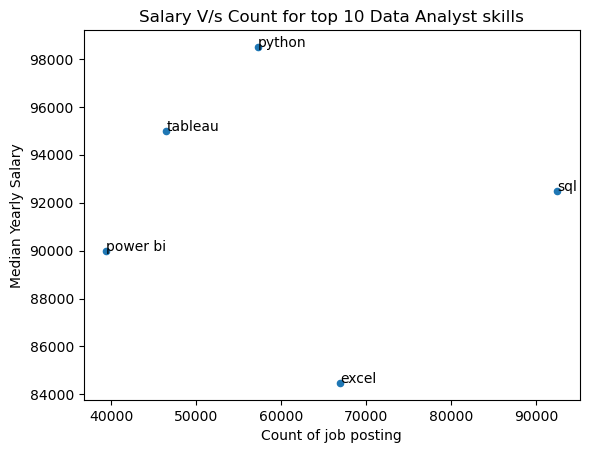

In [56]:
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(5)
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of job posting')
plt.ylabel('Median Yearly Salary')
plt.title('Salary V/s Count for top 10 Data Analyst skills')
for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.tight_layout
plt.show()